In [1]:
import pandas as pd
import numpy as np
df = pd.read_json('./glassdoor_swe.json')
df.drop(labels=['field1'],axis=1,inplace=True)

In [2]:
df

,role,location,jobDesc
0,Junior UI Designer,Stockholm,\nBe part of shaping the visual identity of th...
1,Junior Software Developer,Luleå,"\nDesign, test and implement new and updated s..."
2,Junior Backend Developer,Stockholm,Build and maintain scalable backend applicati...
3,Software engineer - Backend,Stockholm,"\nBackend (TypeScript, GraphQL, SQL, ElasticSe..."
4,SOFTWARE DEVELOPER AND LOOKING FOR A NEW CHALL...,Stockholm,\nMinimum 5 years of experience in backend or ...
...,...,...,...
205,Software engineer - Frontend,Stockholm,"\nFrontend (React, Typescript, GraphQL) \nLang..."
206,Low Code Developer,Stockholm,Certifications and experience within Mendix or...
207,JUNIOR DEVELOPER INTERN,Stockholm,Work with development teams and product manage...
208,Front-End Developer,Lund,\n0-2+ years professional experience with Java...


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "I saw two mice today!"

print(" ".join([token.lemma_ for token in nlp(s)]))

I see two mouse today !


In [4]:
import re
import pandas as pd
from nltk.tokenize import TweetTokenizer

from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

import spacy
nlp = spacy.load('en_core_web_sm')


def remove_stopwords(text) -> str:
    """ Remove stopwords from text """
    filtered_words = [word for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)


def lemmatize(sentence: str) -> str:
    """ Convert all words in sentence to lemmatized form """
    return " ".join([token.lemma_ for token in nlp(sentence)])


def text_clean(s_text: str) -> str:
    """ Text clean """
    try:
        output = re.sub("[^a-zA-Z]+", " ", s_text)  # Filter
        output = re.sub(r"\s+", " ", output)  # Remove multiple spaces
        output = remove_stopwords(output)  # Remove stopwords
        output = output.strip('\'"')  # Remove leading and trailing ' or "
        return output.lower().strip()
    except:
        return ""

def text_len(s_text: str) -> int:
    """ Length of the text """
    return len(s_text)

df = pd.read_csv('./glassdoor_swe.csv',index_col = 0)
df['jobDesc_clean'] = df['jobDesc'].map(text_clean)

df['jobDesc_len'] = df['jobDesc_clean'].map(text_len)
df = df[df['jobDesc_len'] > 32]

display(df)

,role,location,jobDesc,jobDesc_clean,jobDesc_len
0,Junior UI Designer,Stockholm,\nBe part of shaping the visual identity of th...,part shaping visual identity brand extend esta...,1061
1,Junior Software Developer,Luleå,"\nDesign, test and implement new and updated s...",design test implement new updated software pro...,749
2,Junior Backend Developer,Stockholm,Build and maintain scalable backend applicati...,build maintain scalable backend applications s...,245
3,Software engineer - Backend,Stockholm,"\nBackend (TypeScript, GraphQL, SQL, ElasticSe...",backend typescript graphql sql elasticsearch c...,157
4,SOFTWARE DEVELOPER AND LOOKING FOR A NEW CHALL...,Stockholm,\nMinimum 5 years of experience in backend or ...,minimum years experience backend frontend deve...,496
...,...,...,...,...,...
205,Software engineer - Frontend,Stockholm,"\nFrontend (React, Typescript, GraphQL) \nLang...",frontend react typescript graphql languages ty...,72
206,Low Code Developer,Stockholm,Certifications and experience within Mendix or...,certifications experience within mendix outsys...,231
207,JUNIOR DEVELOPER INTERN,Stockholm,Work with development teams and product manage...,work development teams product managers ideate...,481
208,Front-End Developer,Lund,\n0-2+ years professional experience with Java...,years professional experience javascript types...,291


In [5]:
df.loc[0,'jobDesc_clean']

'part shaping visual identity brand extend establish comprehensive design system create easy use templates inspiring guidelines visualize concepts solutions sketches prototypes blueprints collaborate stakeholders designers developers create intuitive user friendly software likely beginning career would bonus examples small projects assignments even personal ideas show us important got right education confidently work english knowing swedish even better familiar design tool figma axure course want see awesome portfolio shows creative work made real impact user experience gotta sweet part design team learning gaining insights experienced design lead senior designer serve mentors helping grow enhance design skills international open working atmosphere colleagues many nationalities lead fast growing company plenty space initiative ability grow skills experience awesome colleagues social working environment hybrid working team also enjoys meeting irl friday beer monday breakfast office foun

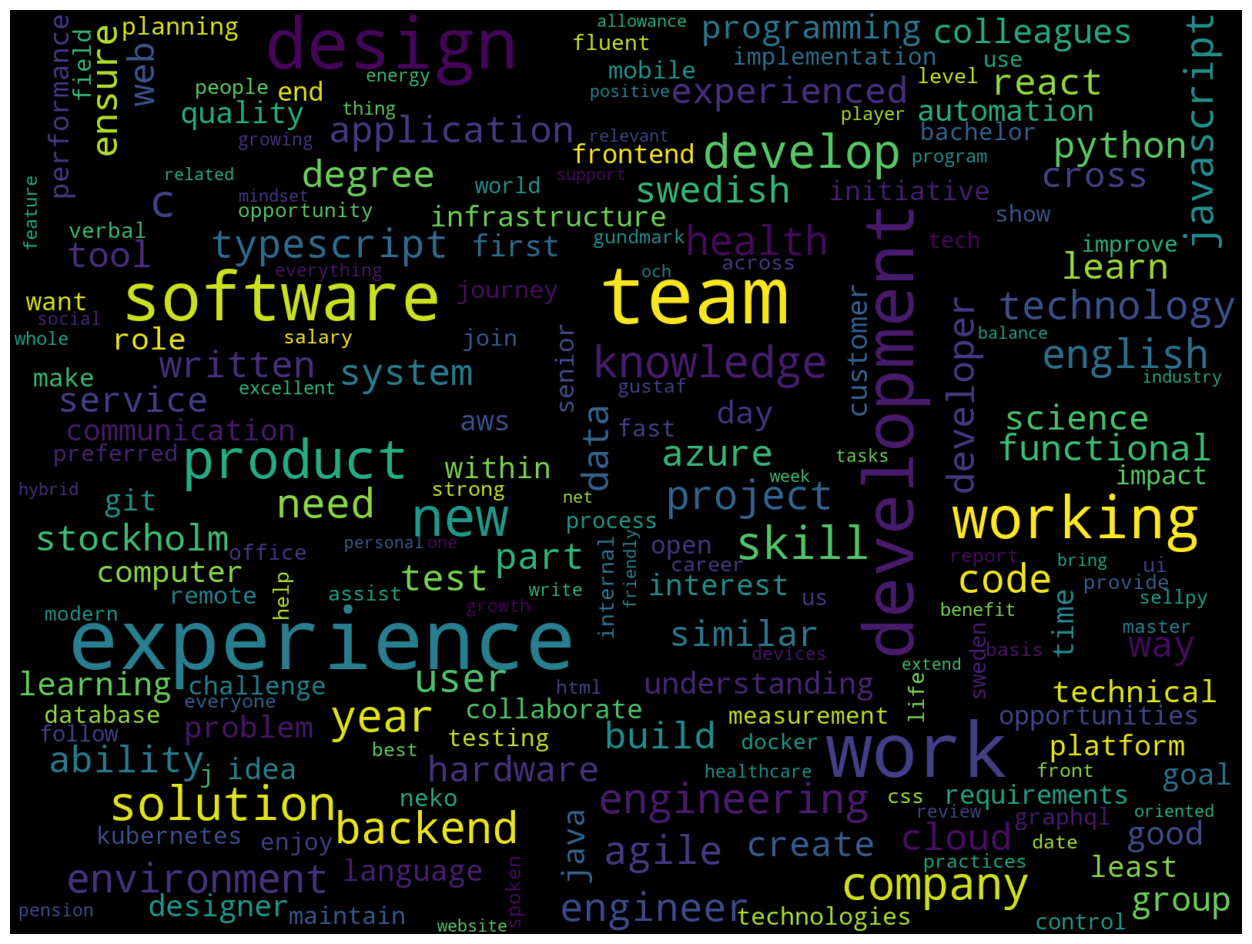

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

def draw_cloud(column: pd.Series, stopwords=None):
    all_words = ' '.join([text for text in column]) 
    
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()
    
    
draw_cloud(df['jobDesc_clean'])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["climate change . information about climate important", 
        "my cat cute . love cat"]

tfidf = TfidfVectorizer()
vectorized_docs = tfidf.fit_transform(docs).todense()

print("Shape:", vectorized_docs.shape)
display(pd.DataFrame(vectorized_docs, columns=tfidf.get_feature_names_out()))

Shape: (2, 9)


,about,cat,change,climate,cute,important,information,love,my
0,0.353553,0.000000,0.353553,0.707107,0.000000,0.353553,0.353553,0.000000,0.000000
1,0.000000,0.755929,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,0.377964


In [8]:
docs = df["jobDesc_clean"].values

tfidf = TfidfVectorizer()
vectorized_docs = np.asarray(tfidf.fit_transform(docs).todense())

print("Shape:", vectorized_docs.shape)

Shape: (210, 1476)


In [9]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

print("Shape:", word_vectors["software"].shape)
display(word_vectors["software"])

Shape: (300,)


array([ 0.20410156, -0.30078125, -0.01391602,  0.11914062, -0.21875   ,
        0.08740234,  0.02490234,  0.296875  ,  0.10253906,  0.03588867,
       -0.03540039, -0.15527344, -0.00390625, -0.14941406,  0.05224609,
        0.04736328,  0.18066406,  0.05810547, -0.1640625 , -0.15136719,
       -0.03808594,  0.16308594, -0.09814453,  0.11035156, -0.02319336,
        0.07958984,  0.10986328,  0.11425781, -0.01025391, -0.24609375,
       -0.08300781, -0.1171875 , -0.11279297, -0.16894531, -0.0067749 ,
       -0.16601562, -0.15039062, -0.08007812,  0.25      ,  0.0098877 ,
        0.04125977,  0.12695312,  0.21777344,  0.05297852, -0.10839844,
        0.0378418 , -0.26171875, -0.21289062, -0.04248047,  0.22949219,
        0.06640625, -0.09716797, -0.01391602, -0.33007812, -0.10986328,
        0.18457031,  0.14257812, -0.1875    ,  0.12402344,  0.06225586,
        0.13085938, -0.01116943, -0.06591797,  0.00059891, -0.34570312,
        0.16015625, -0.13867188,  0.01647949, -0.08203125, -0.03

In [10]:
from nltk import word_tokenize


def word2vec_vectorize(text: str):
    """ Convert text document to the embedding vector """    
    vectors = []
    tokens = word_tokenize(text)
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
            
    return np.asarray(vectors).mean(axis=0) if len(vectors) > 0 else np.zeros(word_vectors.vector_size)

In [11]:
docs = df["jobDesc_clean"].values

vectorized_docs = list(map(word2vec_vectorize, docs))
print("Shape:", np.array(vectorized_docs).shape)

# > Shape: (210, 300)

Shape: (210, 300)


In [12]:
from sentence_transformers import SentenceTransformer

docs = ['the influence of human activity on the warming of the climate system has evolved from theory to established fact', 
        'cats can jump 5 times their own height']

model = SentenceTransformer('all-MiniLM-L6-v2')
vectorized_docs = model.encode(np.asarray(docs))

print("Shape:", vectorized_docs.shape)
# > Shape: (2, 384)

/usr/local/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape: (2, 384)


In [13]:
def partial_clean(s_text: str) -> str:
    """ Convert description to a plain text sentence """
    output = re.sub("[^a-zA-Z]+", " ", s_text)  # Filter
    output = re.sub(r"\s+", " ", output)  # Remove multiple spaces
    output = output.strip('\'"')  # Remove leading and trailing ' or "
    return output

docs = df['jobDesc'].map(partial_clean).values
vectorized_docs = model.encode(np.asarray(docs))
print("Shape:", vectorized_docs.shape)

# > Shape: (210, 384)

Shape: (210, 384)


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def make_clustered_dataframe(x: np.array, k: int) -> pd.DataFrame:
    """ Create a new dataframe with original docs and assigned clusters """
    #ids = np.array(df.index)
    roles = df["role"].values
    locations = df["location"].values
    docs = df["jobDesc_clean"].values
    tokenized_docs = df["jobDesc_clean"].map(text_to_tokens).values
    
    km = KMeans(n_clusters=k).fit(x)
    s_score = silhouette_score(x, km.labels_)
    print(f"K={k}: Silhouette coefficient {s_score:0.2f}, inertia:{km.inertia_}")
    
    # Create new DataFrame
    data_len = x.shape[0]
    df_clusters = pd.DataFrame({
        #"id": ids[:data_len],
        "role": roles[:data_len],
        "location": locations[:data_len],
        "desc": docs[:data_len],
        "tokens": tokenized_docs[:data_len],
        "cluster": km.labels_,
    })
    return df_clusters


def text_to_tokens(text: str) -> list[str]:
    """ Generate tokens from the sentence """
    # "this is text" => ['this', 'is' 'text']
    tokens = word_tokenize(text)  # Get tokens from text
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


# Make clustered dataframe
k = 30
df_clusters = make_clustered_dataframe(vectorized_docs, k)
with pd.option_context('display.max_colwidth', None):
    display(df_clusters)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=30: Silhouette coefficient 0.87, inertia:8.925148010253906


,role,location,desc,tokens,cluster
0,Junior UI Designer,Stockholm,part shaping visual identity brand extend establish comprehensive design system create easy use templates inspiring guidelines visualize concepts solutions sketches prototypes blueprints collaborate stakeholders designers developers create intuitive user friendly software likely beginning career would bonus examples small projects assignments even personal ideas show us important got right education confidently work english knowing swedish even better familiar design tool figma axure course want see awesome portfolio shows creative work made real impact user experience gotta sweet part design team learning gaining insights experienced design lead senior designer serve mentors helping grow enhance design skills international open working atmosphere colleagues many nationalities lead fast growing company plenty space initiative ability grow skills experience awesome colleagues social working environment hybrid working team also enjoys meeting irl friday beer monday breakfast office found centrally stockholm part product team cares deeply customers,"[part, shaping, visual, identity, brand, extend, establish, comprehensive, design, system, create, easy, use, templates, inspiring, guidelines, visualize, concepts, solutions, sketches, prototypes, blueprints, collaborate, stakeholders, designers, developers, create, intuitive, user, friendly, software, likely, beginning, career, would, bonus, examples, small, projects, assignments, even, personal, ideas, show, us, important, got, right, education, confidently, work, english, knowing, swedish, even, better, familiar, design, tool, figma, axure, course, want, see, awesome, portfolio, shows, creative, work, made, real, impact, user, experience, got, ta, sweet, part, design, team, learning, gaining, insights, experienced, design, lead, senior, designer, serve, mentors, helping, grow, enhance, design, skills, international, open, working, atmosphere, colleagues, ...]",19
1,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,"[design, test, implement, new, updated, software, programs, develop, object, oriented, solutions, improve, existing, software, develop, iteratively, using, git, workflow, agile, development, process, document, review, code, ensure, software, quality, standards, upheld, bring, experience, ideas, projects, suggest, possible, solutions, ideation, implementation, testing, experience, programming, developing, software, code, knowledge, programming, languages, python, rust, hands, implementation, work, independently, also, work, team, follow, instructions, ensure, tasks, delivered, good, quality, delivery, time, good, communication, skills, fluent, english, written, spoken, bachelor, master, degree, computer, science, similar, alternatively, gained, similar, knowledge, work, experience, show, interesting, software, program, built]",7
2,Junior Backend Developer,Stockholm,build maintain scalable backend applications services tradera com work harmony software engineers product management ux operational teams develop next generation tradera support web app teams development new features ensure users experience best,"[build, maintain, scalable, backend, applications, services, tradera, com, work, h

Cluster 1: Size:8, avg:1.00, min:1.00, max: 1.00
Cluster 2: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 4: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 5: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 7: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 8: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 9: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 11: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 12: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 13: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 14: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 15: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 17: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 18: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 20: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 21: Size:7, avg:1.00, min:1.00, max: 1.00
Cluster 22: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 23: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 26: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster 27: Size:6, avg:1.00, min:1.00, max: 1.00
Cluster

,role,location,desc,cluster
5,Frontend Developer,Stockholm,website front sales journey guide customer process receiving first solution estimate way installed product home solution design installations build tools needed find optimal energy solution smooth installation senior team everyone lot experience bring table cross functional team setup developers work closely designers product people open mindset trust make decisions try new ways working sometimes get right sometimes agree might brightest idea team lunch least week daily coffee train lobby get nicer coffee changing organisation need smart around organise team also infrastructure comes code design need open change things evolve always scaling mind like include whole team kinds discussions gather input experiences everyone team international market meaning unique needs regulations need follow every country active team key player provides technical platforms selling products collaborate teams across whole company finding new lunch spots fit growing team solid experience product driven software development agile environments experience react typescript experience automated testing rapid growth journeys start ups scale ups new environments next js cms integration seo experience component libraries entrepreneurial confident open minded initiative taking team player motivator excellent communicator competitive salary rewarding secondary benefits chance build global company transformative products fast moving growth journey making positive impact world supportive inclusive culture alive learning opportunities,1
55,Frontend Developer,Stockholm,website front sales journey guide customer process receiving first solution estimate way installed product home solution design installations build tools needed find optimal energy solution smooth installation senior team everyone lot experience bring table cross functional team setup developers work closely designers product people open mindset trust make decisions try new ways working sometimes get right sometimes agree might brightest idea team lunch least week daily coffee train lobby get nicer coffee changing organisation need smart around organise team also infrastructure comes code design need open change things evolve always scaling mind like include whole team kinds discussions gather input experiences everyone team international market meaning unique needs regulations need follow every country active team key player provides technical platforms selling products collaborate teams across whole company finding new lunch spots fit growing team solid experience product driven software development agile environments experience react typescript experience automated testing rapid growth journeys start ups scale ups new environments next js cms integration seo experience component libraries entrepreneurial confident open minded initiative taking team player motivator excellent communicator competitive salary rewarding secondary benefits chance build global company transformative products fast moving growth journey making positive impact world supportive inclusive culture alive learning opportunities,1
84,Frontend Developer,Stockholm,website front sales journey guide customer process receiving first solution estimate way installed product home solution design installations build tools needed find optimal energy solution smooth installation senior team everyone lot experience bring table cross functional team setup developers work closely designers product people open mindset trust make decisions try new ways working sometimes get right sometimes agree might brightest idea team lunch least week daily coffee train lobby get nicer coffee changing organisation need smart around organise team also infrastructure comes code design need open change things evolve always scaling mind like include whole team kinds discussions gather input experiences everyone team international market meaning unique needs regulations need follow every country active

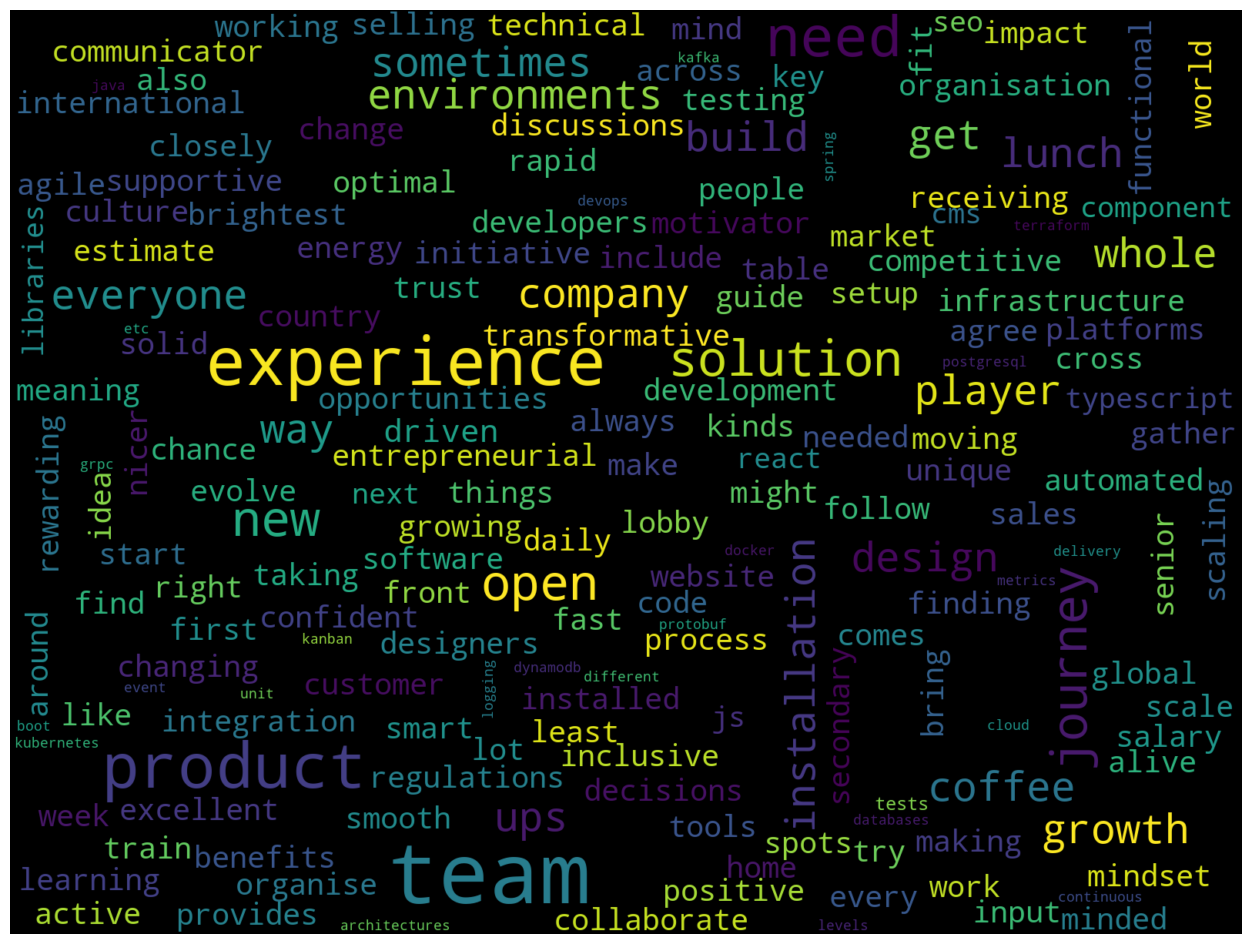

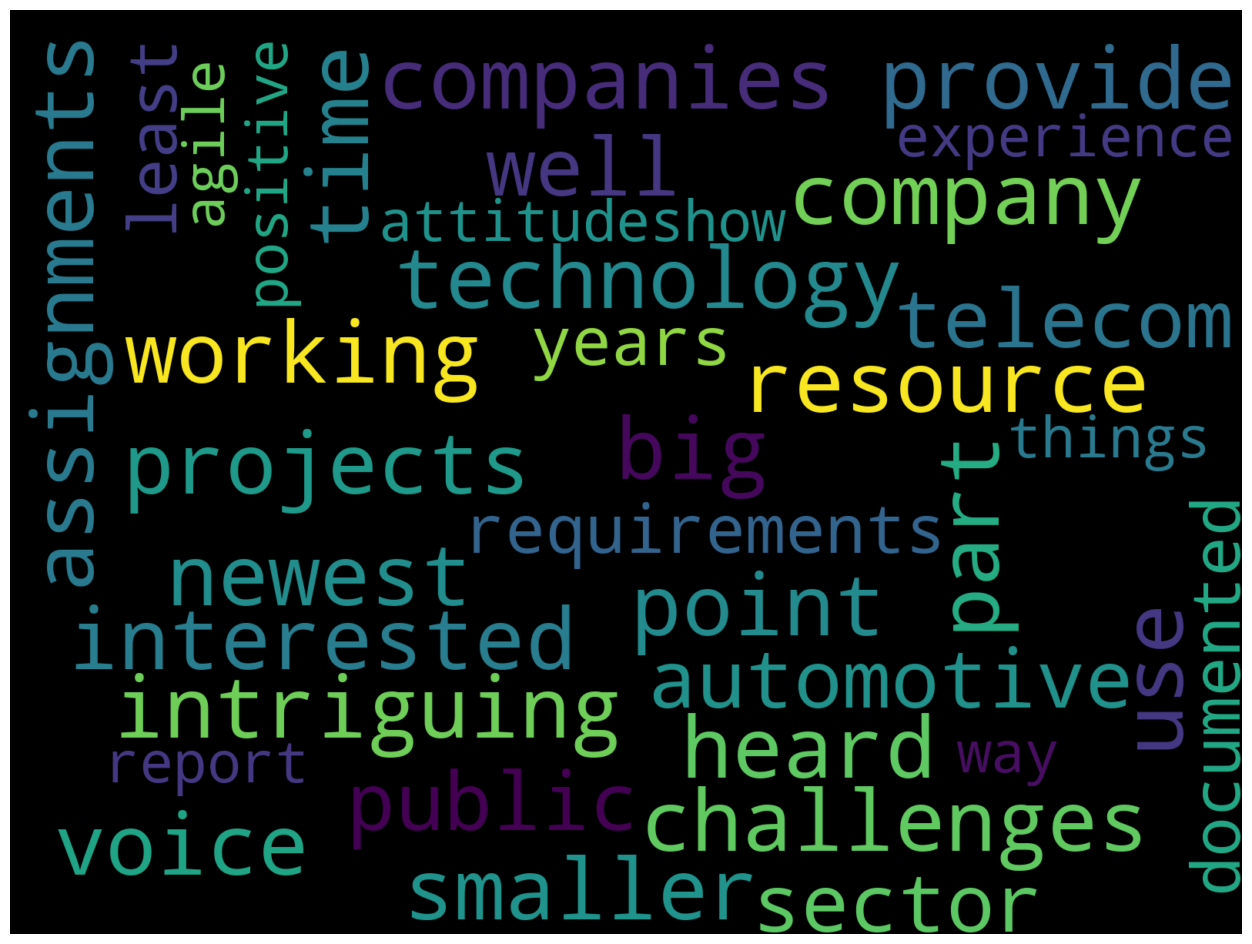

[('interested', 7),
 ('working', 7),
 ('smaller', 7),
 ('company', 7),
 ('voice', 7),
 ('heard', 7),
 ('time', 7),
 ('part', 7),
 ('projects', 7),
 ('big', 7)]

,role,location,desc,cluster
18,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4
54,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4
81,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4
99,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4
171,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4
189,Software Developer with experience,Kista,bs ms computer science software engineering similar alternatively equal knowledge acquired working experience least years working experience experience working linux environment openshift knowledge microservices kubernetes dockers knowledge interest ai ml experience cloud computing awareness critical concepts devops agile principles fluent english spoken written swedish language beneficial,4


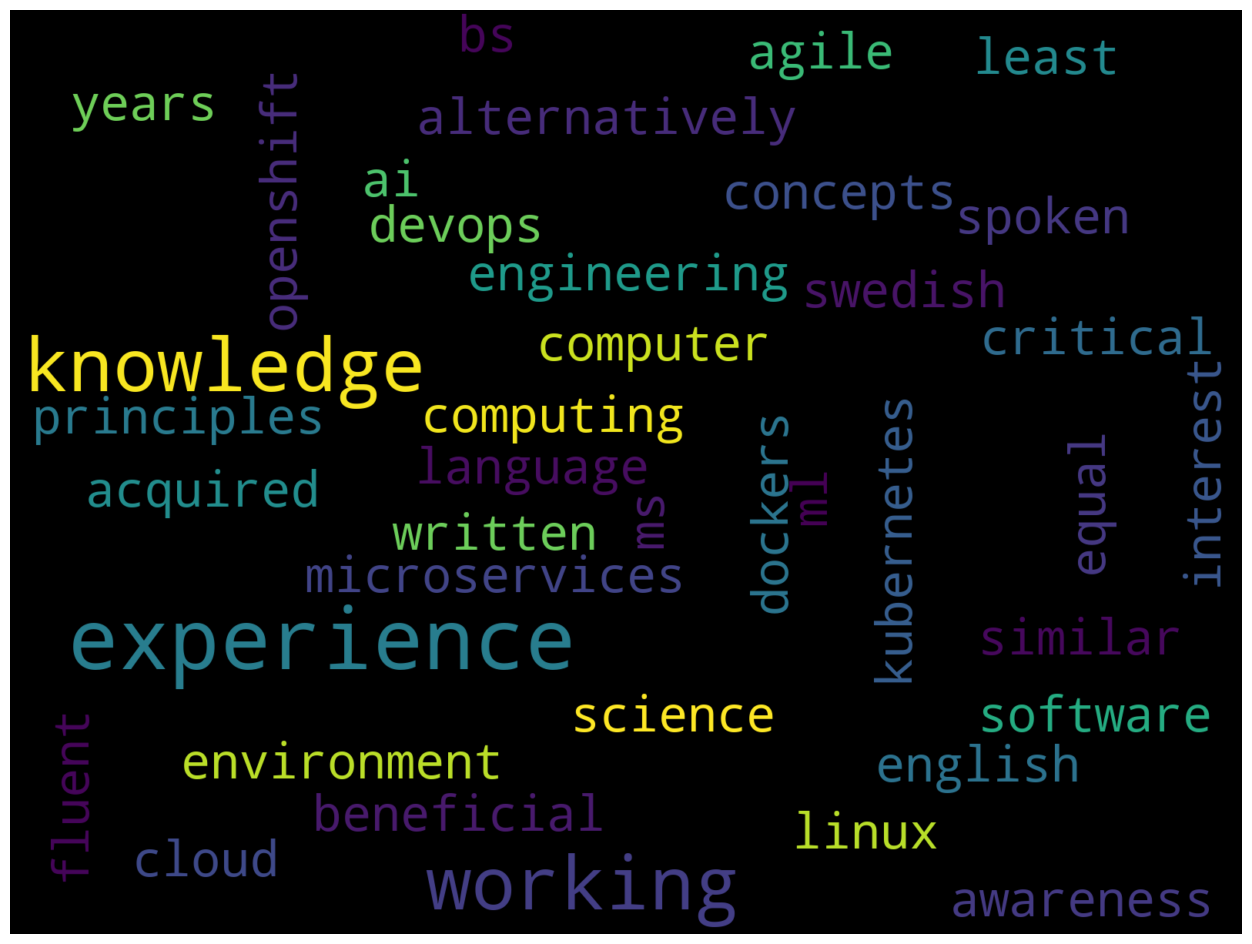

[('experience', 24),
 ('knowledge', 18),
 ('working', 18),
 ('bs', 6),
 ('ms', 6),
 ('computer', 6),
 ('science', 6),
 ('software', 6),
 ('engineering', 6),
 ('similar', 6)]

,role,location,desc,cluster
10,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
31,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
89,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
94,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
124,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
175,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5
205,Software engineer - Frontend,Stockholm,frontend react typescript graphql languages typescript graphql cloud aws,5


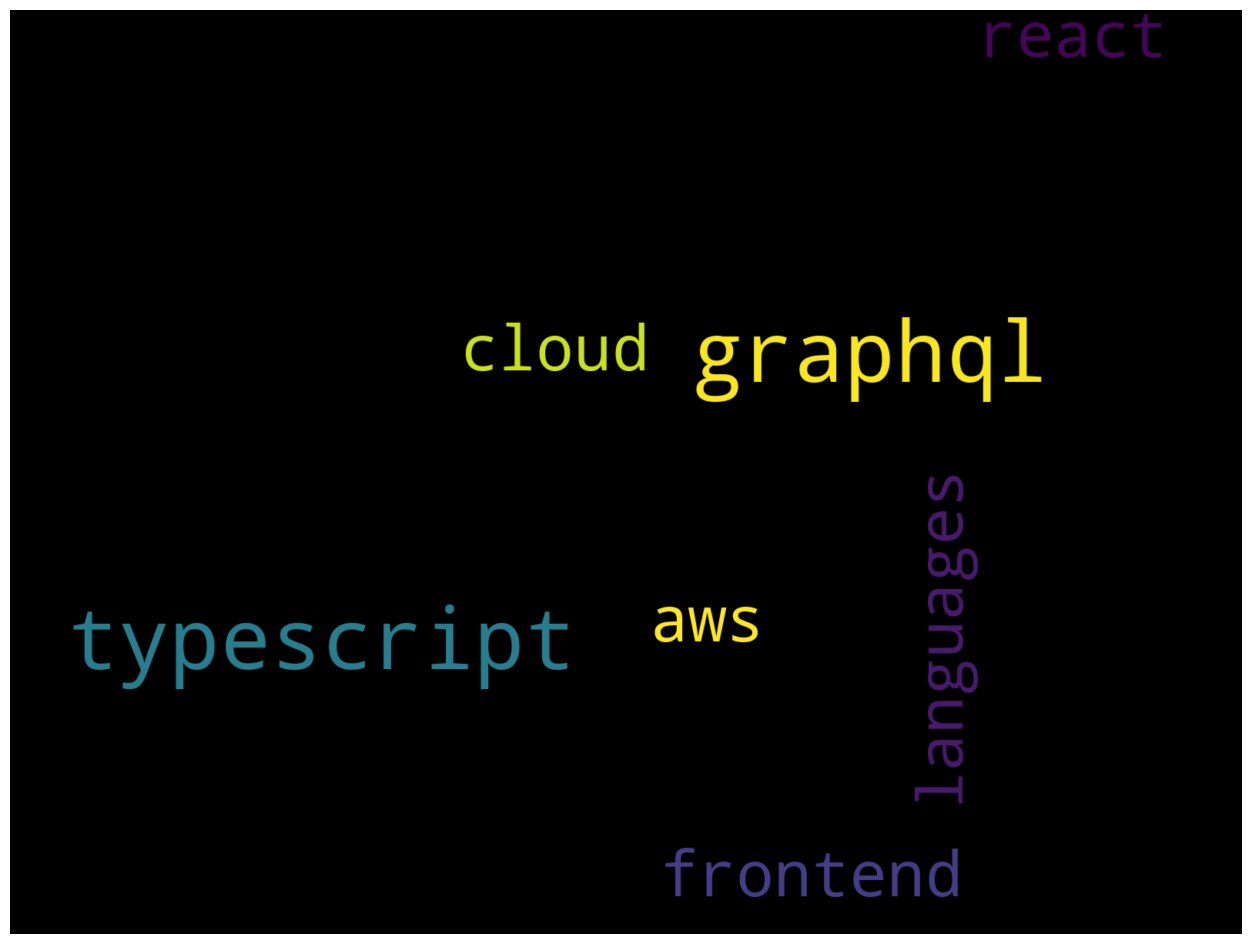

[('typescript', 14),
 ('graphql', 14),
 ('frontend', 7),
 ('react', 7),
 ('languages', 7),
 ('cloud', 7),
 ('aws', 7)]

,role,location,desc,cluster
1,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,7
45,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,7
77,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,7
110,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,7
139,Junior Software Developer,Luleå,design test implement new updated software programs develop object oriented solutions improve existing software develop iteratively using git workflow agile development process document review code ensure software quality standards upheld bring experience ideas projects suggest possible solutions ideation implementation testing experience programming developing software code knowledge programming languages python c c rust hands implementation work independently also work team follow instructions ensure tasks delivered good quality delivery time good communication skills fluent english written spoken bachelor master degree computer science similar alternatively gained similar knowledge work experience show interesting software program built,7
169,Junior Software Developer,Luleå,

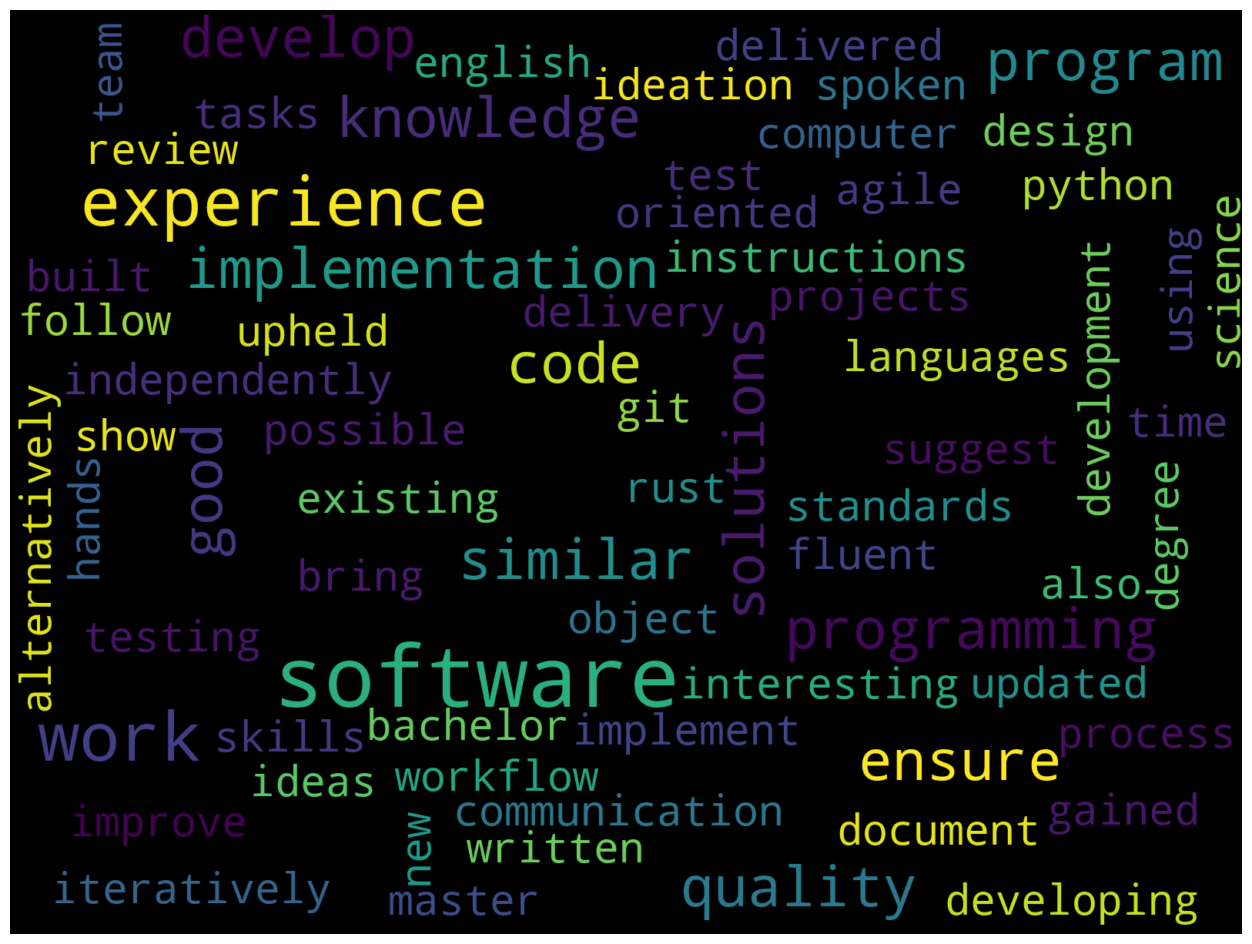

[('software', 35),
 ('experience', 21),
 ('work', 21),
 ('develop', 14),
 ('solutions', 14),
 ('code', 14),
 ('ensure', 14),
 ('quality', 14),
 ('implementation', 14),
 ('programming', 14)]

,role,location,desc,cluster
27,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
57,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
88,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
104,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
131,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
178,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8
202,Frontend Software Developer,Stockholm,build maintain customer experience website connect site backend services monitor test continuously optimize designs deliver modern testable maintainable code years experience web development know build user friendly data rich javascript html css applications experienced modern javascript coding testing debugging automation techniques enjoy working team value individual team success experience interest machine learning ai understanding infrastructure network ci cd pipelines,8


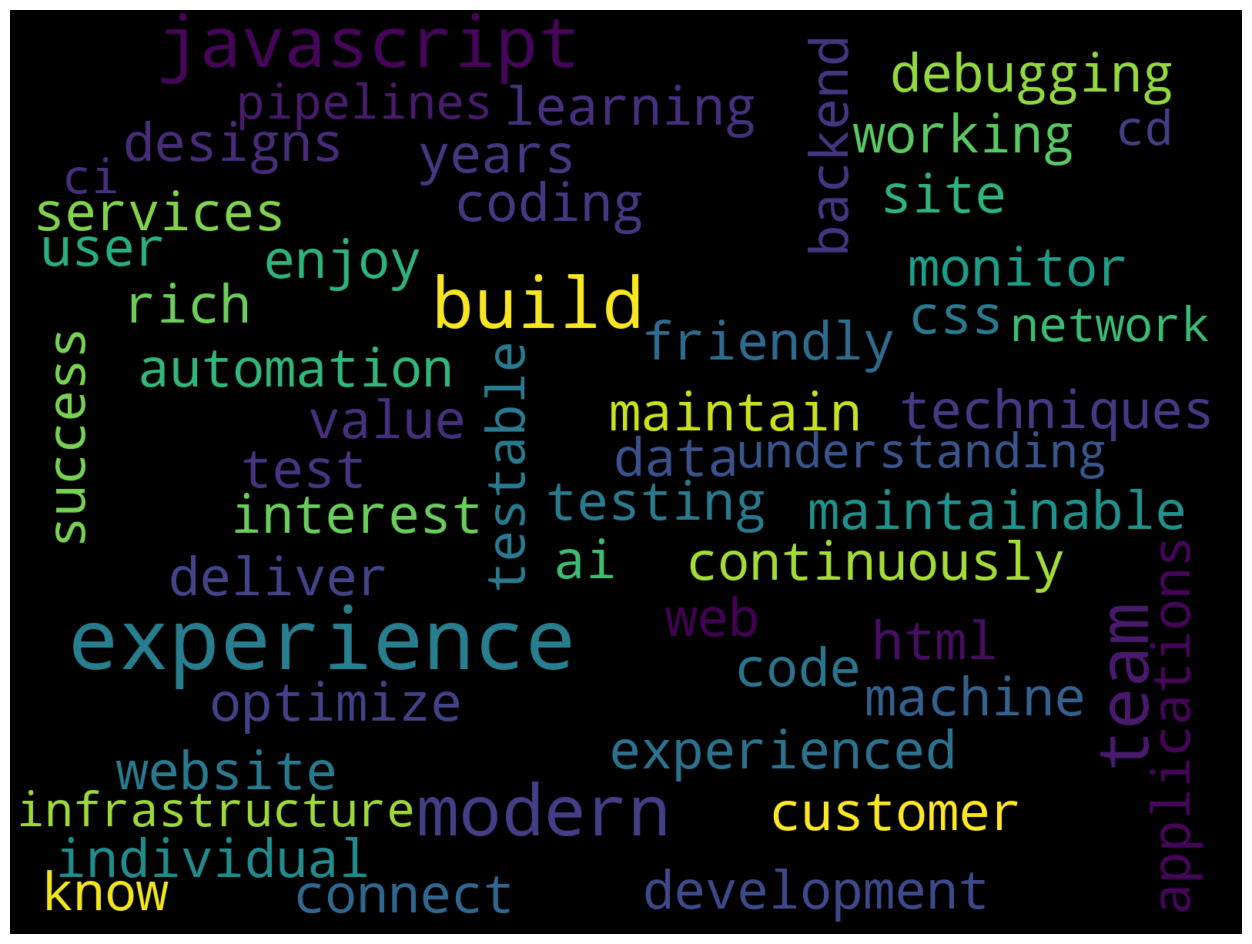

[('experience', 21),
 ('build', 14),
 ('modern', 14),
 ('javascript', 14),
 ('team', 14),
 ('maintain', 7),
 ('customer', 7),
 ('website', 7),
 ('connect', 7),
 ('site', 7)]

,role,location,desc,cluster
7,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
35,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
64,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
93,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
128,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
179,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9
200,Frontend Developer,Karlstad,health initiatives wellness allowance amazing talented colleagues internal career opportunities opportunity influence group role,9


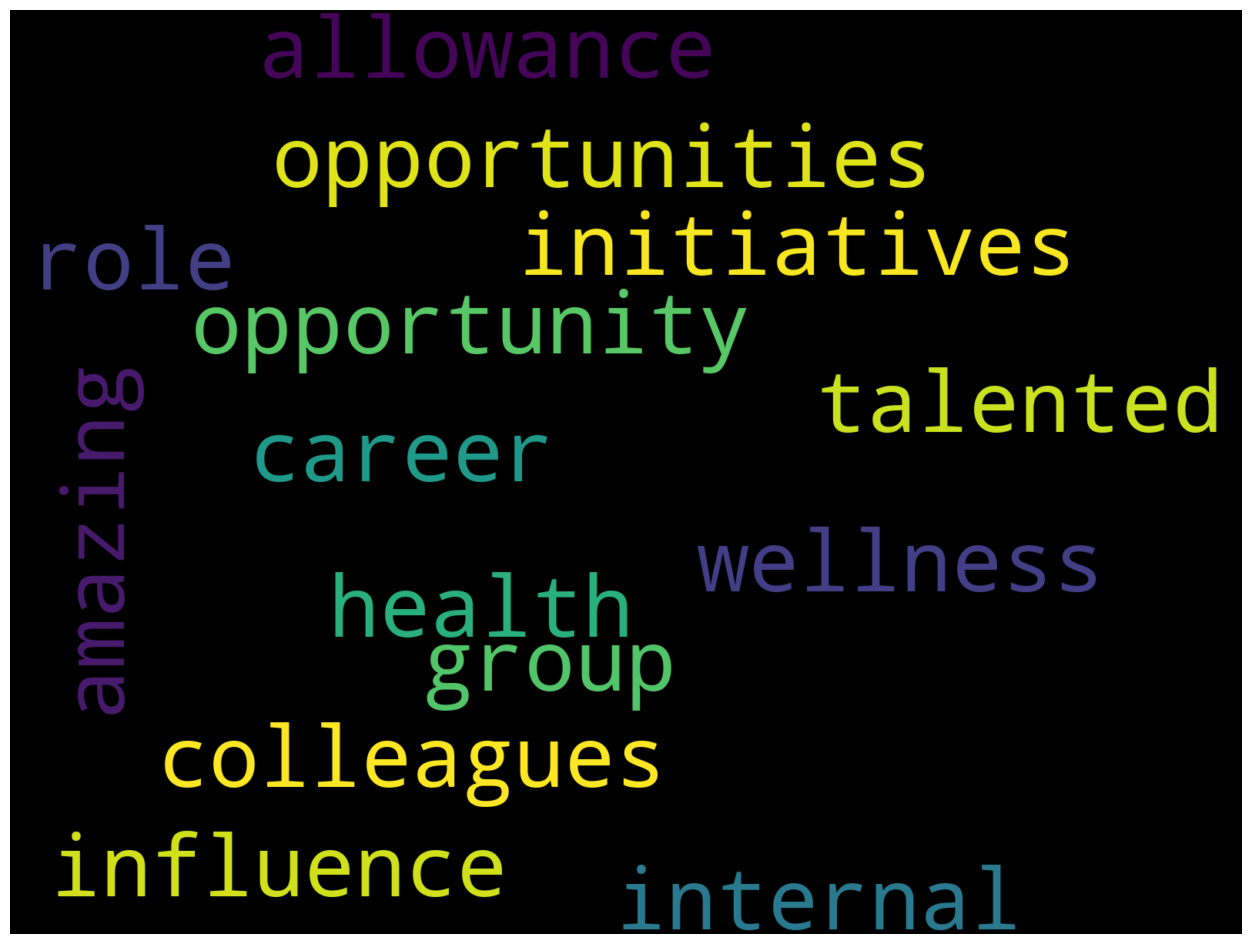

[('health', 7),
 ('initiatives', 7),
 ('wellness', 7),
 ('allowance', 7),
 ('amazing', 7),
 ('talented', 7),
 ('colleagues', 7),
 ('internal', 7),
 ('career', 7),
 ('opportunities', 7)]

In [15]:
from sklearn.metrics import silhouette_samples
from collections import Counter

def show_clusters_info(x: np.array, k: int, cdf: pd.DataFrame):
    """ Print clusters info and top clusters """
    labels = cdf["cluster"].values
    sample_silhouette_values = silhouette_samples(x, labels)
    
    # Get silhouette values per cluster    
    silhouette_values = []
    for i in range(k):
        cluster_values = sample_silhouette_values[labels == i]
        silhouette_values.append((i, 
                                  cluster_values.shape[0], 
                                  cluster_values.mean(), 
                                  cluster_values.min(), 
                                  cluster_values.max()))
    # Sort
    silhouette_values = sorted(silhouette_values, 
                               key=lambda tup: tup[2], 
                               reverse=True)
    
    # Show clusters, sorted by silhouette values
    for s in silhouette_values:
        print(f"Cluster {s[0]}: Size:{s[1]}, avg:{s[2]:.2f}, min:{s[3]:.2f}, max: {s[4]:.2f}")

    # Show top 7 clusters
    top_clusters = []
    for cl in silhouette_values[:7]:
        df_c = cdf[cdf['cluster'] == cl[0]]

        # Show cluster
        with pd.option_context('display.max_colwidth', None):
            display(df_c[["role","location","desc", "cluster"]])
            
        # Show words cloud
        s_all = ""
        for tokens_list in df_c['tokens'].values:
            s_all += ' '.join([text for text in tokens_list]) + " "            
        draw_cloud_from_words(s_all, stopwords=["url"])
        
        # Show most popular words
        vocab = Counter()
        for token in df_c["tokens"].values:
            vocab.update(token)
        display(vocab.most_common(10))


def draw_cloud_from_words(all_words: str, stopwords=None):
    """ Show the word cloud from the list of words """
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()


show_clusters_info(vectorized_docs, k, df_clusters)

Processing: 2
Processing: 4
Processing: 6
Processing: 8
Processing: 10
Processing: 12


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

Processing: 14
Processing: 16
Processing: 18


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 20
Processing: 22


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 24
Processing: 26


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 28
Processing: 30


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 32
Processing: 34


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 36
Processing: 38


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 40
Processing: 42


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 44
Processing: 46


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 48


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/hs/qhq9yllx36v_z2trzhg4wmyh0000gn/T/ipykernel_41677/1246116281.py:9: ConvergenceWarning: Number of distinct clusters (46) found smaller than n_clusters (48). Possibly due to duplicate points in X.
  km = KMeans(n_clusters=k).fit(x)


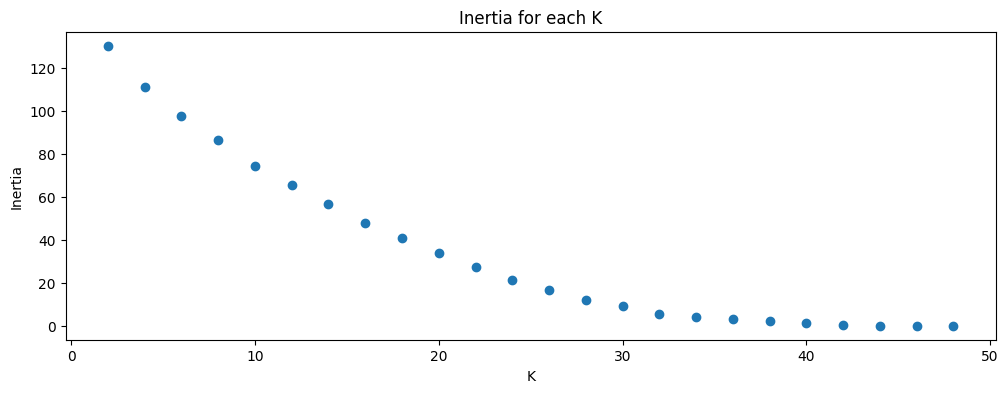

In [16]:
import matplotlib.pyplot as plt  
%matplotlib inline


def graw_elbow_graph(x: np.array, k1: int, k2: int, k3: int):
    k_values, inertia_values = [], []
    for k in range(k1, k2, k3):
        print("Processing:", k)
        km = KMeans(n_clusters=k).fit(x)
        k_values.append(k)
        inertia_values.append(km.inertia_)

    plt.figure(figsize=(12,4))
    plt.plot(k_values, inertia_values, 'o')
    plt.title('Inertia for each K')
    plt.xlabel('K')
    plt.ylabel('Inertia')


graw_elbow_graph(vectorized_docs, 2, 50, 2)

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from bokeh.io import show, output_notebook, export_png
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label, Whisker, FactorRange
from bokeh.transform import factor_cmap, factor_mark, cumsum
from bokeh.palettes import *
from bokeh.layouts import row, column
output_notebook()


def draw_clusters_tsne(docs: list, cdf: pd.DataFrame):
    """ Draw clusters using TSNE """
    cluster_labels = cdf["cluster"].values
    cluster_names = [str(c) for c in cluster_labels]
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, 
                init='pca', learning_rate='auto')
    tsne_results = tsne.fit_transform(vectorized_docs)

    # Plot output
    x, y = tsne_results[:, 0], tsne_results[:, 1]
    source = ColumnDataSource(dict(x=x, 
                                   y=y, 
                                   labels=cluster_labels,
                                   colors=cluster_names))
    palette = (RdYlBu11 + BrBG11 + Viridis11 + Plasma11 + Cividis11 + RdGy11)[:len(cluster_names)]

    p = figure(width=400, height=300, title="")
    p.scatter("x", "y",
              source=source, fill_alpha=0.8, size=4,
              legend_group='labels',
              color=factor_cmap('colors', palette, cluster_names)
              )
    show(p)
    

draw_clusters_tsne(vectorized_docs, df_clusters)

Loading BokehJS ...

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.000s...
[t-SNE] Computed neighbors for 210 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 0.560543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.014332
[t-SNE] KL divergence after 300 iterations: -0.524695
